In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/mococomac/PycharmProjects/bsFactor/joined_data.csv')

In [64]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [65]:
print("there's " + str(data.shape[0]) + ' author indices, with sb values from ' +str(np.round(data['BS_Index'].min(),4)) + ' to ' + str(data['BS_Index'].max())+ ', from ' + str(len(data["Country"].unique())) + ' countries, with '+str(np.round(np.mean(data['n_papers']))) + ' \nfirst/last author papers on average')

there's 6093 author indices, with sb values from 0.0 to 9.8458904109589, from 42 countries, with 38.0 
first/last author papers on average


In [89]:
data_with_g_hin = data.dropna()

In [90]:
data_with_g_hin = data_with_g_hin.loc[data_with_g_hin.Field == 'Neuroscience']

In [91]:
'There are {} neuroscience authors for which we have gender and h index info'.format(data_with_g_hin.shape[0])

'There are 988 neuroscience authors for which we have gender and h index info'

women tend to have lower sb index (which is bad), lower h index and lower n of papers

In [92]:
data_with_g_hin.groupby(['Gender']).mean()

,BS_Index,H-Index,n_papers
Gender,,,
F,1.073096,29.222591,19.993355
M,1.148552,44.081514,35.065502


In [70]:
import scipy

In [71]:
res = scipy.stats.spearmanr(data_with_g_hin['BS_Index'], data_with_g_hin['H-Index'])

sb index and h index correlate strongly

In [93]:
res

SpearmanrResult(correlation=0.34772669852602367, pvalue=3.658101497052554e-23)

In [94]:
colors = {'M':'tab:blue', 'F':'tab:pink'}

plot of sb index and h index, with gender as hue

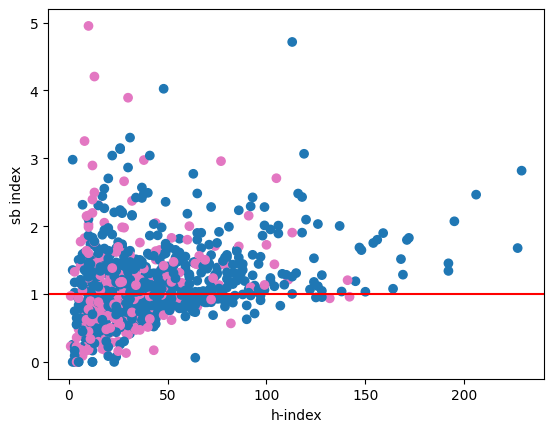

In [101]:
plt.scatter(x=data_with_g_hin['H-Index'],y=data_with_g_hin['BS_Index'],c=data_with_g_hin['Gender'].map(colors));
plt.axhline(1, c='r')
plt.xlabel('h-index');
plt.ylabel('sb index');

interestingly though, it seems like some women with lower h-index tend to have better bias scores, meaning they're undervalued with respect to their male counterparts, we have little data though... roughly double the males than the women, perhaps i should focus on labelling 300 more women from the dataset

In [100]:
data_with_g_hin.groupby(['Gender']).count()['Author']

Gender
F    301
M    687
Name: Author, dtype: int64